In [1]:
%load_ext autoreload
%autoreload 2

import sys
import neuromaps
sys.path.insert(1, '../')

# Apply PCA on all neuro-maps

## Get all neuro-maps ready

In [12]:
from src.analysis.neuromaps.neuro_map import get_all_maps_data

all_maps_data = get_all_maps_data(space_and_res=['fsaverage', '10k'], save_mean_map=True)
print(all_maps_data.shape)

(20484, 73)


In [44]:
all_maps_data.head()

,abagen_genepc1,aghourian2017_feobv,alarkurtti2015_raclopride,bedard2019_feobv,beliveau2017_az10419369,beliveau2017_cimbi36,beliveau2017_cumi101,beliveau2017_dasb,beliveau2017_sb207145,ding2010_mrb,...,savli2012_p943,savli2012_way100635,smart2019_abp688,smith2017_flb457,sydnor2021_SAaxis,tuominen_feobv,turtonen2020_carfentanil,vijay2018_ly2795050,xu2020_FChomology,xu2020_evoexp
0,0.926062,29.940592,19.675194,6.232431,19.046242,38.983974,18.213535,3.768073,1.426886,0.212753,...,34.429264,15.426361,0.628737,0.424092,-1.361867,1.489281,0.689492,3.575771,2.748157,14.300251
1,0.329398,25.239946,19.034925,5.727873,17.530110,48.146683,24.961237,2.943486,1.986338,0.055404,...,34.840244,23.075690,0.836642,0.775620,-0.741499,1.279240,0.925126,3.033448,2.828433,4.748050
2,-0.686432,35.991780,21.441463,8.006074,21.875153,49.383290,31.249410,7.353974,1.917316,0.198037,...,24.826010,23.199635,1.002560,0.758347,-1.040026,1.822300,1.327922,3.638870,2.646573,7.872761
3,-0.632078,22.976032,21.850592,6.109472,21.801037,56.177190,31.964327,4.039649,2.219914,0.013665,...,35.003830,30.418497,0.745354,0.624820,1.132573,1.292445,1.429287,2.806267,2.312117,7.021942
4,-0.191919,32.014374,18.353613,7.150065,22.947230,55.168910,36.956740,4.921956,2.382612,0.145331,...,50.763540,33.910570,1.089943,0.580311,-0.278109,1.605585,1.285226,3.643642,1.467916,7.873157


## Apply PCA

In [13]:
from pca import pca

model = pca(normalize=True)
results = model.fit_transform(all_maps_data, col_labels=all_maps_data.columns)
model.results['variance_ratio'][:10]

[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [73] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [25] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [73] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[25]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


array([0.39882511, 0.13317863, 0.06664123, 0.06321446, 0.04021263,
       0.0381693 , 0.03068401, 0.02256657, 0.01833336, 0.01690466])

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 25 Principal Components explain [95.44%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

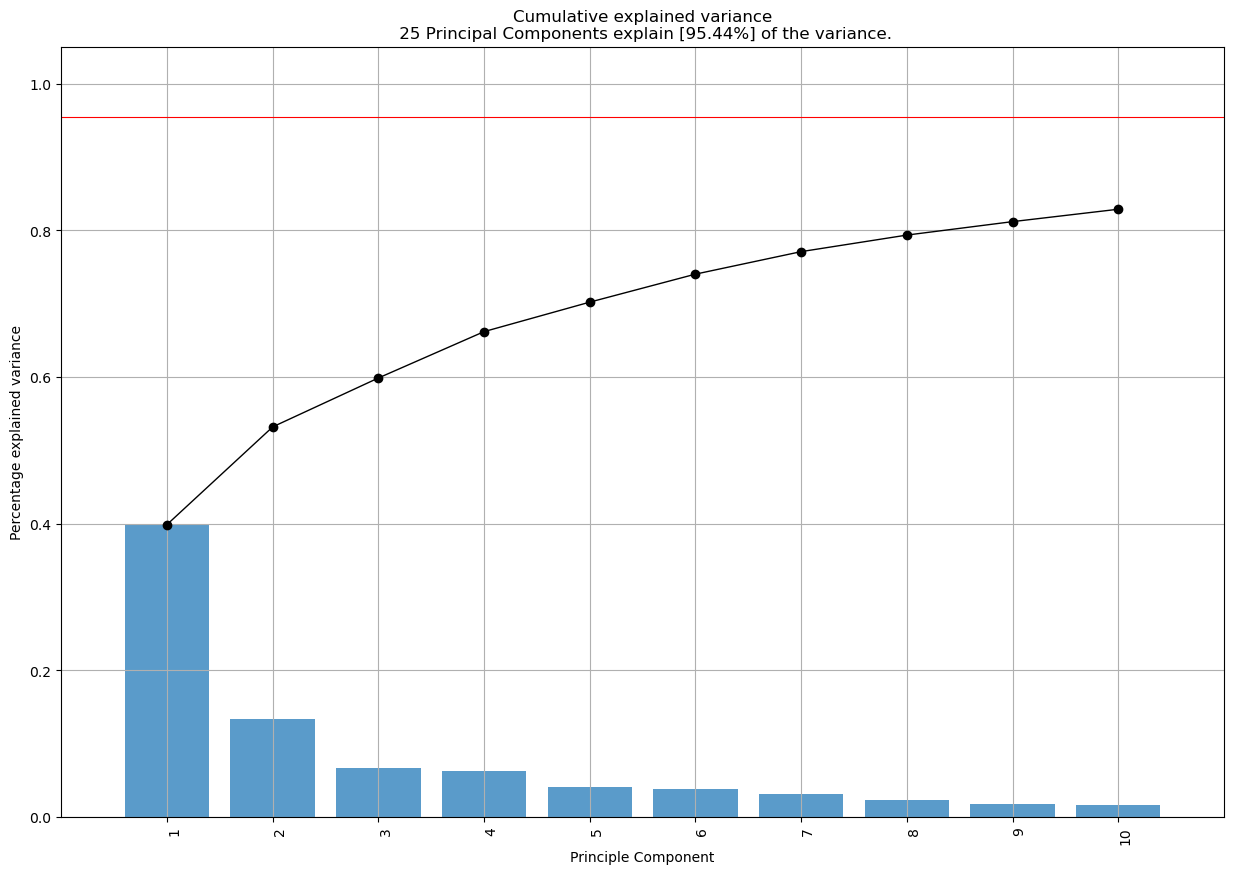

In [14]:
model.plot(n_components=10)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '26 Principal Components explain [95.63%] of the variance'}, xlabel='PC1 (39.4% expl.var)', ylabel='PC2 (13.2% expl.var)'>)

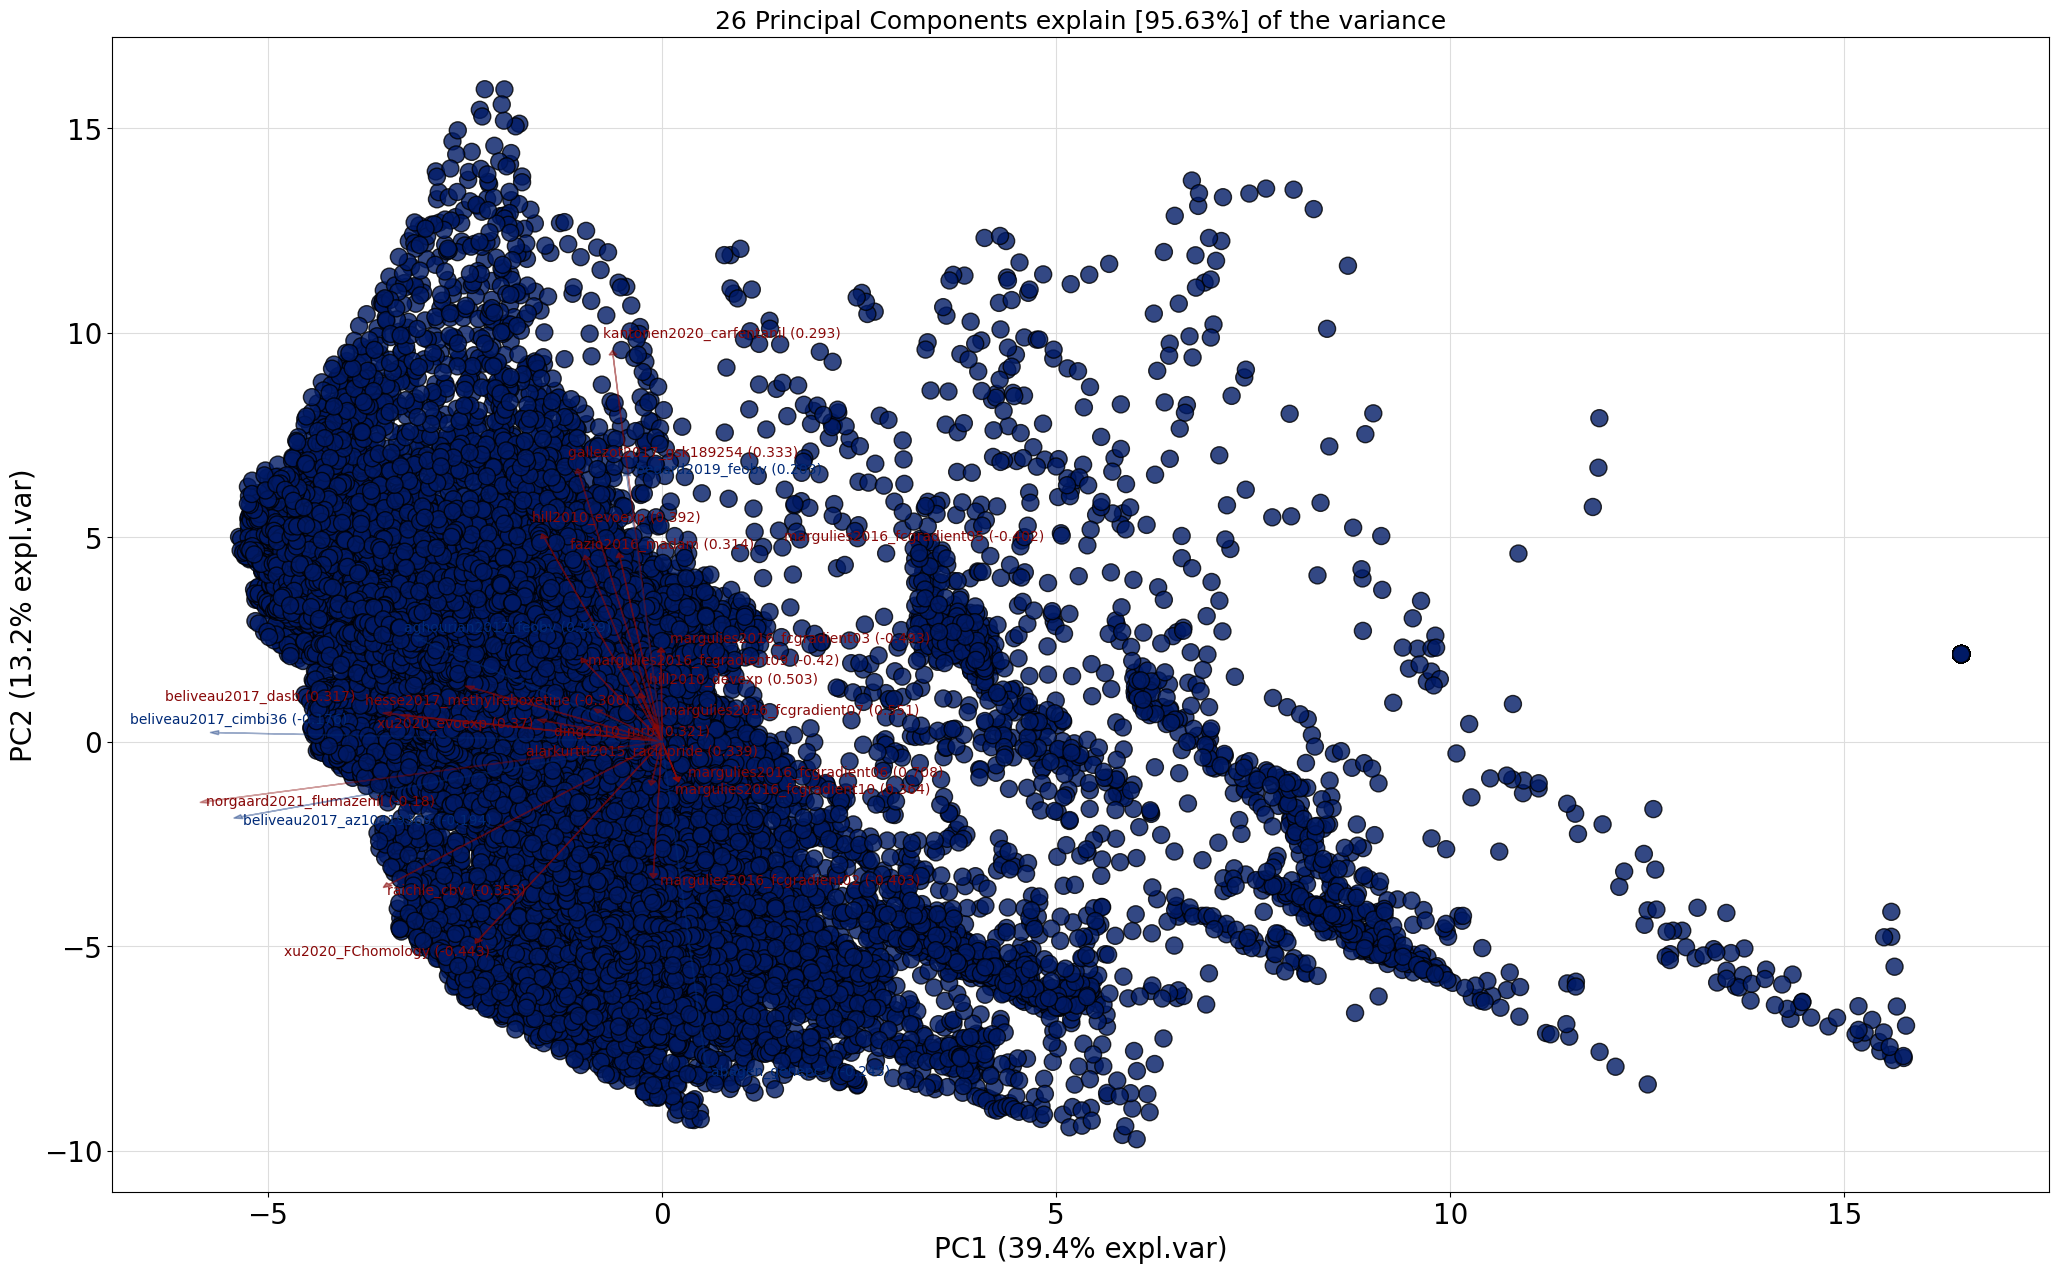

In [47]:
model.biplot(fontsize=10)

In [15]:
print(model.results['topfeat'][:20])

      PC                     feature   loading  type
0    PC1     norgaard2021_flumazenil -0.178985  best
1    PC2    kantonen2020_carfentanil  0.293508  best
2    PC3                ding2010_mrb -0.375445  best
3    PC4              savli2012_dasb  0.328396  best
4    PC5  margulies2016_fcgradient02  0.404185  best
5    PC6  margulies2016_fcgradient09 -0.413422  best
6    PC7   alarkurtti2015_raclopride  0.338122  best
7    PC8  margulies2016_fcgradient07  0.560878  best
8    PC9  margulies2016_fcgradient03 -0.482882  best
9   PC10  margulies2016_fcgradient10  0.391534  best
10  PC11  margulies2016_fcgradient06  0.696079  best
11  PC12  margulies2016_fcgradient05 -0.407384  best
12  PC13  margulies2016_fcgradient10  0.566977  best
13  PC14             hill2010_devexp  0.488172  best
14  PC15             hill2010_devexp  0.522714  best
15  PC16             fazio2016_madam  0.426685  best
16  PC17                 raichle_cbv  0.438354  best
17  PC18   alarkurtti2015_raclopride -0.495518

In [ ]:
from src.utils.neuromaps_utils import find_top_feat

# top_feat = find_top_feat(all_maps_data, max_exp_var_loss=0.01)

### Apply PCA on selected neuro-maps

In [179]:
# exclude features at indices 59, 60, 61, 62
# all_maps_data = all_maps_data.drop(all_maps_data.columns[[59, 60, 61, 62]], axis=1)

exclude_features = ['naganawa2020_lsn3172176']
all_maps_data = all_maps_data.drop(columns=exclude_features)

In [180]:
all_maps_data.head()

,abagen_genepc1,aghourian2017_feobv,alarkurtti2015_raclopride,bedard2019_feobv,beliveau2017_az10419369,beliveau2017_cimbi36,beliveau2017_cumi101,beliveau2017_dasb,beliveau2017_sb207145,ding2010_mrb,...,savli2012_p943,savli2012_way100635,smart2019_abp688,smith2017_flb457,sydnor2021_SAaxis,tuominen_feobv,turtonen2020_carfentanil,vijay2018_ly2795050,xu2020_FChomology,xu2020_evoexp
0,-0.055266,26.771072,21.471891,6.719392,19.891432,58.666926,37.133411,4.855486,2.580883,0.011367,...,47.138908,38.391934,0.945275,1.041243,0.286454,1.531585,1.228175,2.933496,1.165420,14.949493
1,0.000000,36.912670,20.829719,7.408247,21.390626,49.623427,37.450722,7.108733,2.215514,0.066604,...,41.387068,31.728589,1.018062,0.941707,0.441334,1.861095,1.544159,3.815416,1.007469,7.167850
2,-0.265495,25.913110,21.491742,6.407052,23.844539,56.371459,27.941238,3.738851,2.051533,0.023816,...,49.776194,30.710471,0.896788,0.543012,1.135316,1.353429,1.344650,3.074937,1.383555,20.790396
3,1.959673,22.401325,21.257515,5.775613,22.631512,53.074072,18.120502,6.083142,1.759601,0.073002,...,39.409040,23.403724,0.898418,0.451630,-1.534328,1.344559,0.368027,2.580314,3.524512,19.876309
4,0.000000,26.183353,16.927978,6.392349,10.935031,33.148912,56.286924,8.465437,2.146212,-0.178233,...,8.764255,60.526929,0.577167,0.589041,0.269138,1.238791,0.904953,2.283556,1.194440,8.432491


In [181]:
from pca import pca

model = pca(normalize=True)
results = model.fit_transform(all_maps_data, col_labels=all_maps_data.columns)
model.results['variance_ratio'][:20]

[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [70] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [16] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [70] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[16]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


array([0.25653767, 0.21981288, 0.1092942 , 0.09269517, 0.08396946,
       0.04531928, 0.02963892, 0.0254307 , 0.01994204, 0.01623513,
       0.01371719, 0.01155226, 0.00975547, 0.00841622, 0.00700972,
       0.00573232, 0.00559577, 0.00491829, 0.00408816, 0.00366793])

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 16 Principal Components explain [96.06%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

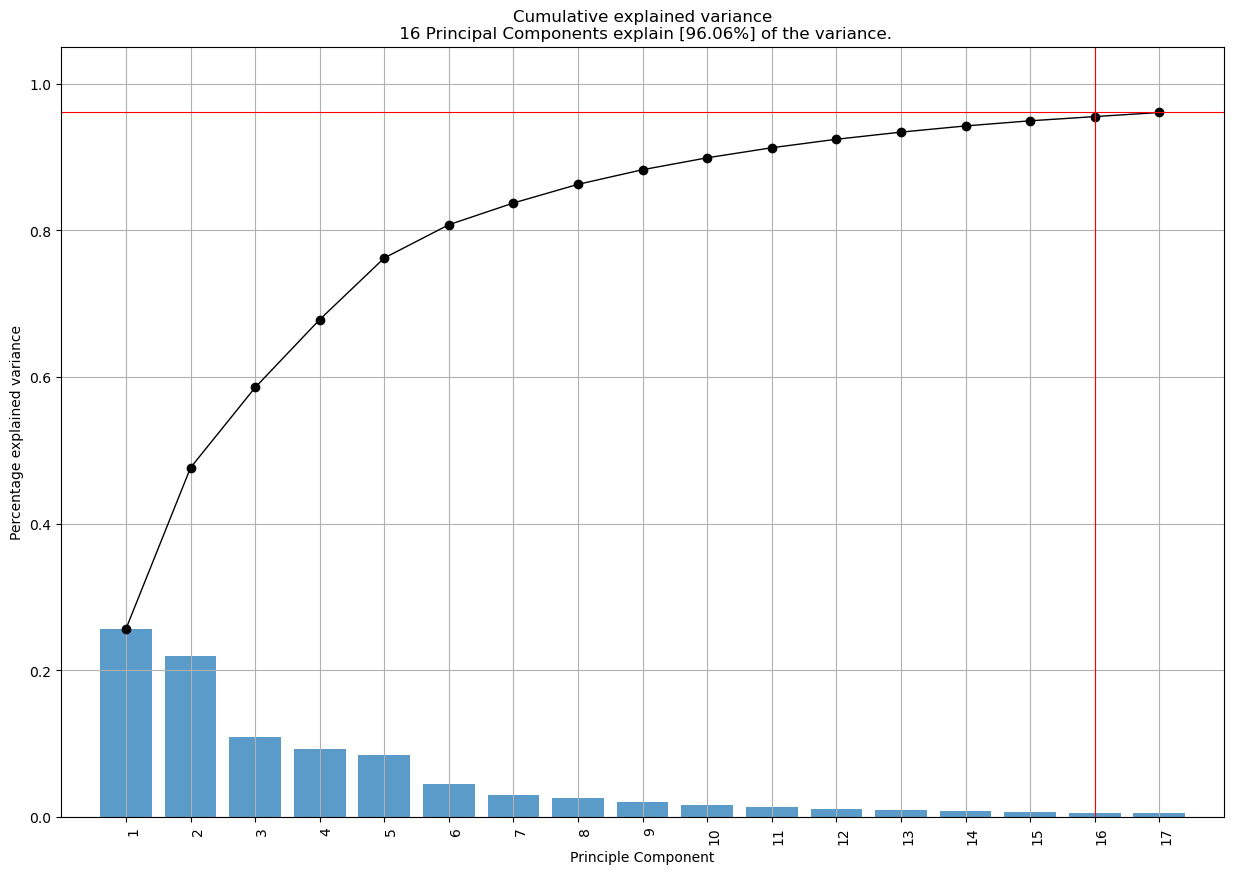

In [182]:
model.plot(n_components=17)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '16 Principal Components explain [96.06%] of the variance'}, xlabel='PC1 (25.6% expl.var)', ylabel='PC2 (21.9% expl.var)'>)

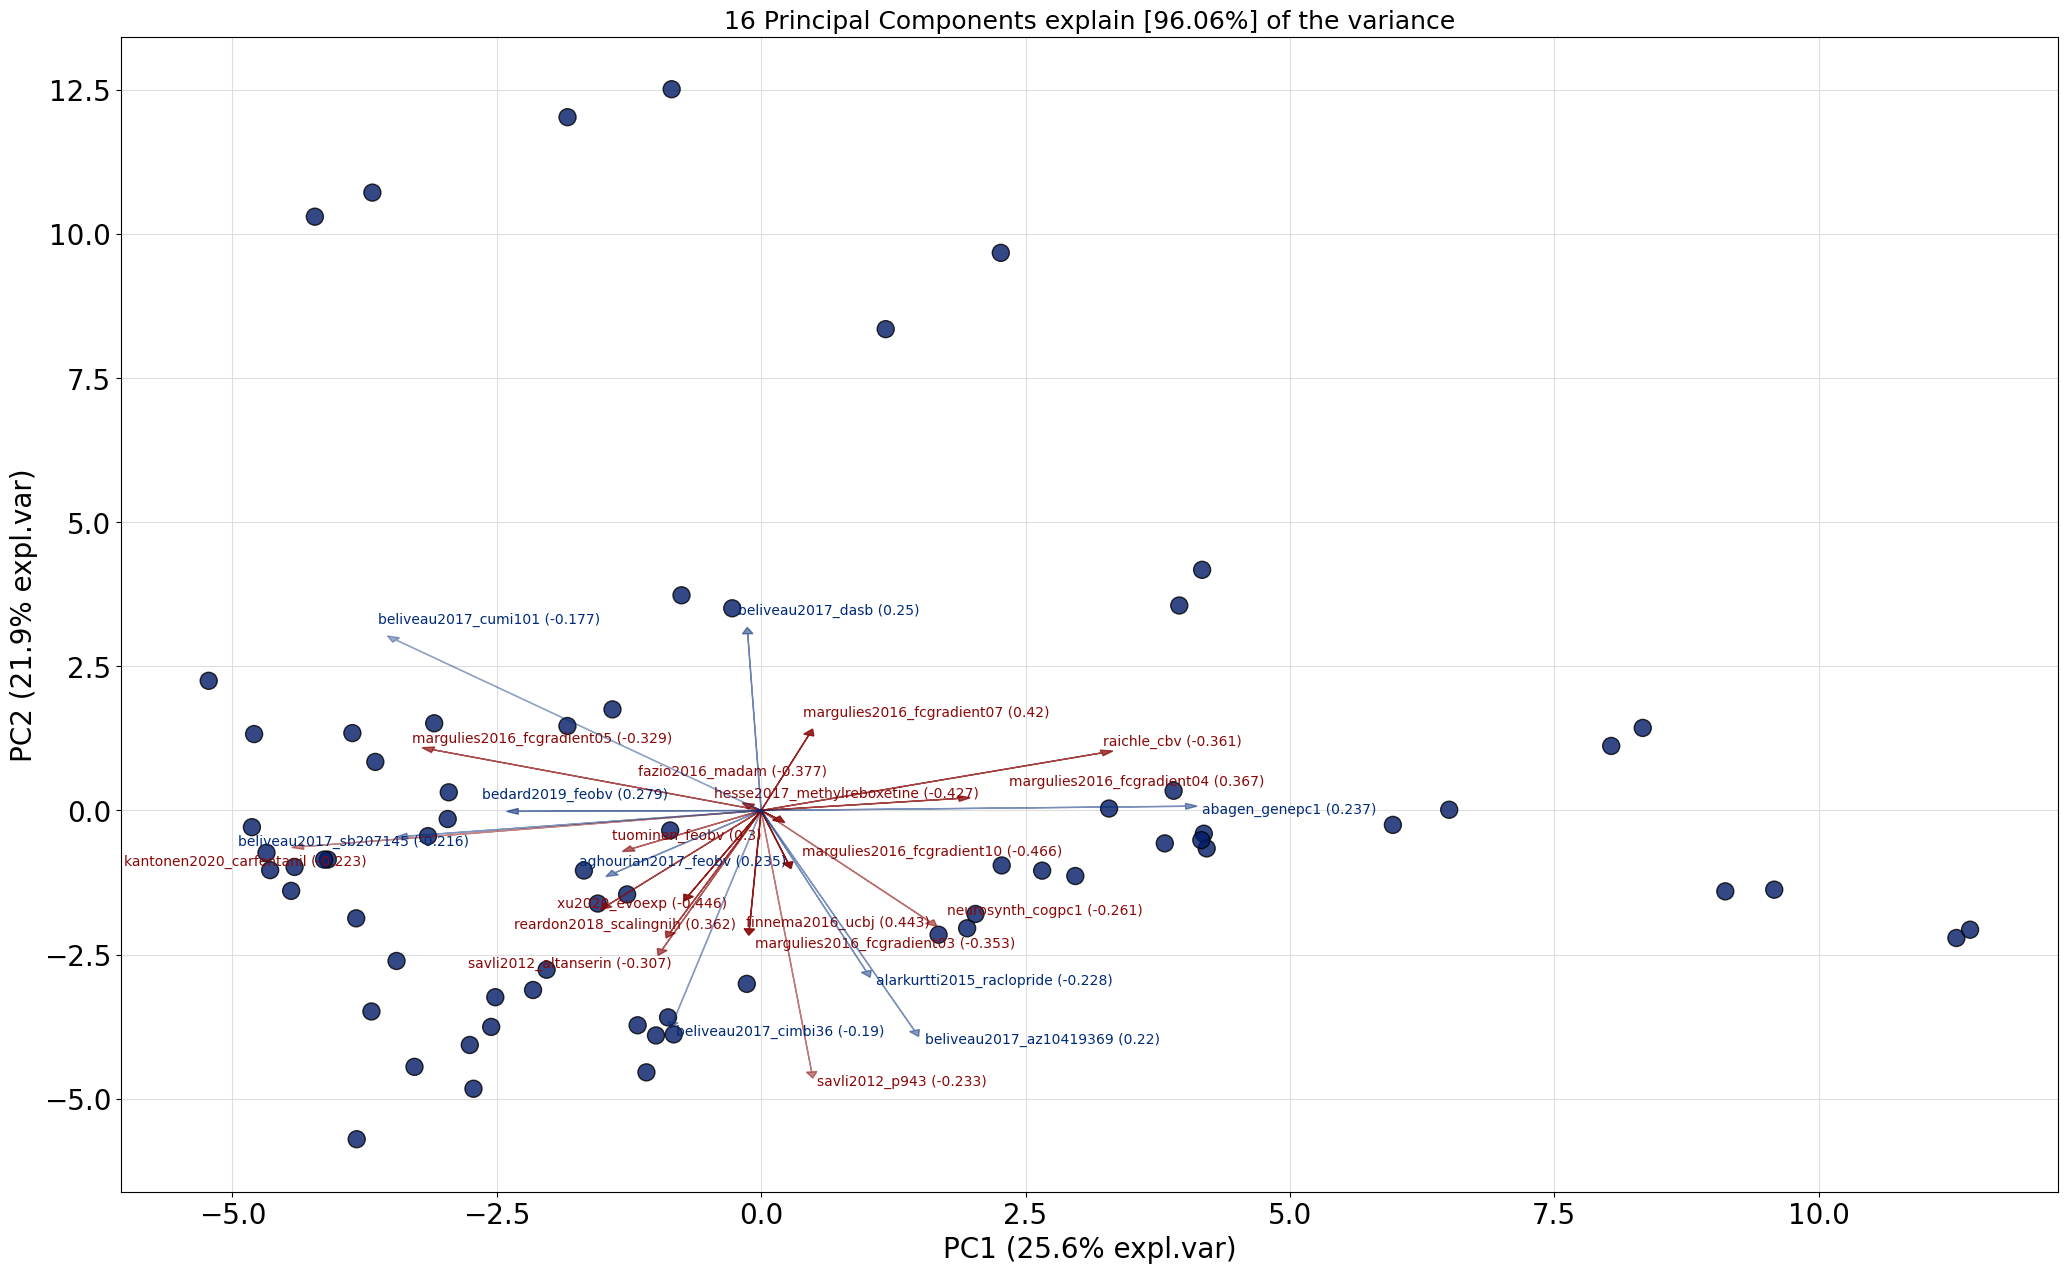

In [183]:
model.biplot(fontsize=10)

In [185]:
print(model.results['topfeat'][:20])

      PC                     feature   loading  type
0    PC1    kantonen2020_carfentanil -0.222720  best
1    PC2              savli2012_p943 -0.232826  best
2    PC3              tuominen_feobv  0.299731  best
3    PC4        savli2012_altanserin -0.306732  best
4    PC5           neurosynth_cogpc1 -0.260950  best
5    PC6  margulies2016_fcgradient07  0.419548  best
6    PC7            finnema2016_ucbj  0.443347  best
7    PC8  margulies2016_fcgradient03 -0.352574  best
8    PC9  margulies2016_fcgradient05 -0.329425  best
9   PC10               xu2020_evoexp -0.445831  best
10  PC11      reardon2018_scalingnih  0.362139  best
11  PC12  hesse2017_methylreboxetine -0.426948  best
12  PC13  margulies2016_fcgradient10 -0.466199  best
13  PC14                 raichle_cbv -0.360940  best
14  PC15             fazio2016_madam -0.377479  best
15  PC16  margulies2016_fcgradient04  0.367145  best
16  PC14              abagen_genepc1  0.236775  weak
17   PC3         aghourian2017_feobv  0.235204

## Get PCs and test the new parameterization

### Get PCs

In [16]:
model.results['PC'].shape

(20484, 25)

In [17]:
type(model.results['PC'])

pandas.core.frame.DataFrame

In [19]:
from src.utils.neuromaps_utils import convert_to_desikan, get_mapping_labels
from src.basic.constants import DESIKAN_NEUROMAPS_DIR, NEUROMAPS_DATA_DIR
import os

num_of_saved_PC = 25
mapping_labels = get_mapping_labels('fsaverage', '10k')
save_dir = DESIKAN_NEUROMAPS_DIR
for i in range(num_of_saved_PC):
    pc = model.results['PC'].iloc[:, i]
    pc_file_path = os.path.join(NEUROMAPS_DATA_DIR, 'fsaverage_10k',
                                f'pc{i+1}.csv')
    pc.to_csv(pc_file_path, header=False, index=False)

    desikan_pc_file_path = os.path.join(save_dir, f'pc{i+1}.csv')
    convert_to_desikan(pc, mapping_labels, desikan_pc_file_path)

### Draw the surface maps for the neuromaps mean and PCs

In [4]:
from src.utils.neuromaps_utils import vis_PC_myelin_gradient_corr
vis_PC_myelin_gradient_corr(num_of_PCs=3)

In [25]:
from src.utils.analysis_utils import visualize_stats
from src.basic.constants import DESIKAN_NEUROMAPS_DIR
import os

mean_map_path = os.path.join(DESIKAN_NEUROMAPS_DIR, 'mean_map.csv')
visualize_stats(mean_map_path, 'mean_map', mean_map_path.replace('.csv', '_surf_map.png'), 'mean of neuromaps')
num_of_PCs = 3

pc_paths = []
pc_names = []
pc_fig_paths = []
pc_fig_titles = []
for i in range(num_of_PCs):
    pc_path = os.path.join(DESIKAN_NEUROMAPS_DIR, f'pc{i+1}.csv')
    pc_paths.append(pc_path)
    pc_names.append(f'pc{i+1}')
    pc_fig_paths.append(pc_path.replace('.csv', '_surf_map.png'))
    pc_fig_titles.append(f'PC{i+1} of neuromaps')

visualize_stats(pc_paths, pc_names, pc_fig_paths, pc_fig_titles)

mean_map saved to /home/ftian/storage/projects/MFM_exploration/tmp/mean_map.mat
Running MATLAB command: matlab -nodisplay -nosplash -nodesktop -r "try, addpath(genpath('/home/ftian/storage/projects/MFM_exploration/src/utils/matlab')); load('/home/ftian/storage/projects/MFM_exploration/tmp/mean_map.mat', 'mean_map'); vis_DK68_param(mean_map, '/home/ftian/storage/projects/MFM_exploration/data/neuromaps/desikan/mean_map_surf_map.png', 'mean of neuromaps'); catch ME, disp(ME.message), exit(1), end, exit;"

                            < M A T L A B (R) >
                  Copyright 1984-2018 The MathWorks, Inc.
                   R2018b (9.5.0.944444) 64-bit (glnxa64)
                              August 28, 2018

 
To get started, type doc.
For product information, visit www.mathworks.com.
 
Reading from version 2
colortable with 36 entries read (originally /autofs/space/amaebi_026/users/buckner_cortical_atlas/scripts/colortable_final.txt)
Reading from version 2
colortable with 36 entries 

### Test whether we can reconstruct the myelin and rsfc gradient using the new parameterization

Reconstructing myelin:
MSE: 0.005419554346152564


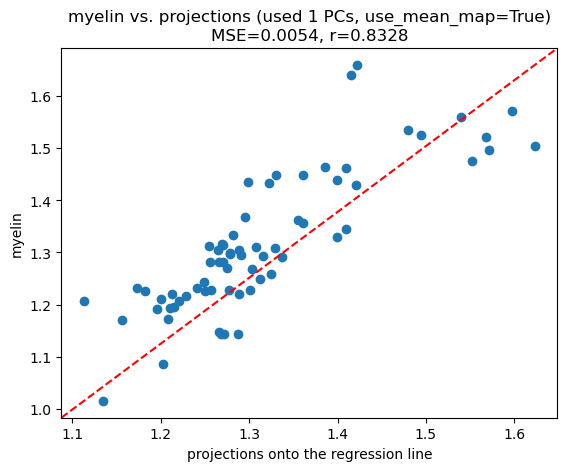

myelin saved to /home/ftian/storage/projects/MFM_exploration/tmp/myelin.mat
Running MATLAB command: matlab -nodisplay -nosplash -nodesktop -r "try, addpath(genpath('/home/ftian/storage/projects/MFM_exploration/src/utils/matlab')); load('/home/ftian/storage/projects/MFM_exploration/tmp/myelin.mat', 'myelin'); vis_DK68_param(myelin, '/home/ftian/storage/projects/MFM_exploration/reports/figures/neuromaps/reconstruction/myelin_surf_map.png', 'Ground truth myelin'); catch ME, disp(ME.message), exit(1), end, exit;"

                            < M A T L A B (R) >
                  Copyright 1984-2018 The MathWorks, Inc.
                   R2018b (9.5.0.944444) 64-bit (glnxa64)
                              August 28, 2018

 
To get started, type doc.
For product information, visit www.mathworks.com.
 
Reading from version 2
colortable with 36 entries read (originally /autofs/space/amaebi_026/users/buckner_cortical_atlas/scripts/colortable_final.txt)
Reading from version 2
colortable with 36 

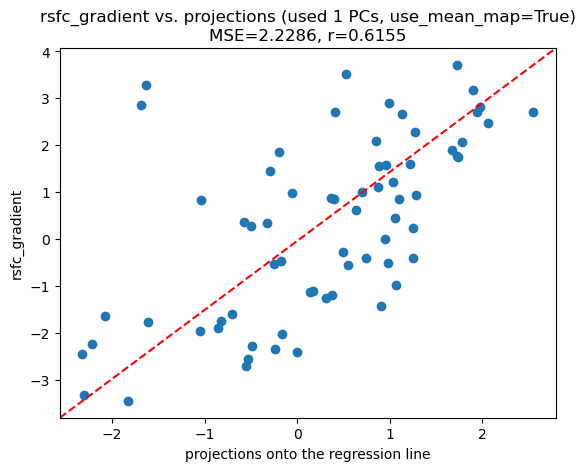

rsfc_gradient saved to /home/ftian/storage/projects/MFM_exploration/tmp/rsfc_gradient.mat
Running MATLAB command: matlab -nodisplay -nosplash -nodesktop -r "try, addpath(genpath('/home/ftian/storage/projects/MFM_exploration/src/utils/matlab')); load('/home/ftian/storage/projects/MFM_exploration/tmp/rsfc_gradient.mat', 'rsfc_gradient'); vis_DK68_param(rsfc_gradient, '/home/ftian/storage/projects/MFM_exploration/reports/figures/neuromaps/reconstruction/rsfc_gradient_surf_map.png', 'Ground truth rsfc gradient'); catch ME, disp(ME.message), exit(1), end, exit;"

                            < M A T L A B (R) >
                  Copyright 1984-2018 The MathWorks, Inc.
                   R2018b (9.5.0.944444) 64-bit (glnxa64)
                              August 28, 2018

 
To get started, type doc.
For product information, visit www.mathworks.com.
 
Reading from version 2
colortable with 36 entries read (originally /autofs/space/amaebi_026/users/buckner_cortical_atlas/scripts/colortable_fina

In [2]:
from src.utils.neuromaps_utils import reconstruct
from src.utils.file_utils import get_HCPYA_group_myelin, get_HCPYA_group_rsfc_gradient

# get the myelin and rsfc gradient
group_myelin = get_HCPYA_group_myelin(0, 343).numpy()
group_rsfc_gradient = get_HCPYA_group_rsfc_gradient(0, 343).numpy()

for num_of_PCs in [1]:
# for num_of_PCs in [2]:
    recon_res = reconstruct(num_of_PCs, group_myelin, 'myelin', visualize_recon=True, use_mean_map=True)
    recon_res = reconstruct(num_of_PCs, group_rsfc_gradient, 'rsfc_gradient', visualize_recon=True, use_mean_map=True)

## Compare neuromaps package's transformation with ours

In [12]:
import pandas as pd
import numpy as np

CBIG_res_path = '/home/ftian/storage/projects/MFM_exploration/data/neuromaps/CBIG_fsaverage_10k/hesse2017_methylreboxetine.csv'
CBIG_res = pd.read_csv(CBIG_res_path, header=None).values.flatten()
# check whether it has nan
print(CBIG_res.shape)
print(CBIG_res[~np.isnan(CBIG_res)].shape)

(20484,)
(20478,)


In [ ]:
from src.utils.neuromaps_utils import vis_transform_diff

author_map_name = [('hesse2017', 'methylreboxetine'), ('hillmer2016', 'flubatine'), ('jaworska2020', 'fallypride'), ('laurikainen2018', 'fmpepd2'), ('satterthwaite2014', 'meancbf'), ('savli2012', 'dasb'), ('turtonen2020', 'carfentanil')]
# author_map_name = [('hesse2017', 'methylreboxetine'), ('hillmer2016', 'flubatine'), ('jaworska2020', 'fallypride'), ('laurikainen2018', 'fmpepd2'), ('savli2012', 'dasb'), ('turtonen2020', 'carfentanil')]
# author_map_name = [('hesse2017', 'methylreboxetine')]
for author, map_name in author_map_name:
    vis_transform_diff(author, map_name)


In [32]:
from src.utils.neuromaps_utils import vis_myelin_diff, vis_rsfc_gradient_diff

vis_myelin_diff()
vis_rsfc_gradient_diff()

## Debugging

In [4]:
from neuromaps.datasets import fetch_atlas

In [ ]:
mni152 = fetch_atlas('MNI152', '1mm', data_dir=NEUROMAPS_DATA_DIR)
print(sorted(mni152))

In [ ]:
fslr = fetch_atlas('fsLR', '32k', data_dir=NEUROMAPS_DATA_DIR)
print(sorted(fslr))

In [7]:
import nibabel as nib

fslr_left_infl = nib.load(fslr['inflated'].L)
vertices = fslr_left_infl.agg_data('NIFTI_INTENT_POINTSET')
print(vertices.shape[0])

32492


In [21]:
print(type(fslr_left_infl))

<class 'nibabel.gifti.gifti.GiftiImage'>


In [ ]:
from neuromaps.datasets import available_annotations
for annotation in available_annotations():
    print(annotation)
print(type(annotation))

In [24]:
from neuromaps.datasets import available_tags
print(available_tags())

['ASL', 'MEG', 'MRI', 'PET', 'fMRI', 'functional', 'genetics', 'meta-analysis', 'metabolism', 'receptors', 'structural']


In [ ]:
# Read and extract the annotation from the first column of used_neuromaps_info.csv file under NEUROMAPS_SRC_DIR
import pandas as pd
import os
from src.basic.constants import NEUROMAPS_SRC_DIR
used_neuromaps_info = pd.read_csv(os.path.join(NEUROMAPS_SRC_DIR, 'used_neuromaps_info.csv'))
print(used_neuromaps_info.columns)
print(used_neuromaps_info.head(1))
all_annotations = used_neuromaps_info['annotation'].to_list()
print(len(all_annotations))
print(all_annotations[:5])

In [13]:
from neuromaps.datasets import fetch_annotation
annotation = fetch_annotation(source='all', data_dir=NEUROMAPS_DATA_DIR)
print(annotation)

{('abagen', 'genepc1', 'fsaverage', '10k'): ['/home/ftian/storage/projects/MFM_exploration/data/neuromaps/annotations/abagen/genepc1/fsaverage/source-abagen_desc-genepc1_space-fsaverage_den-10k_hemi-L_feature.func.gii', '/home/ftian/storage/projects/MFM_exploration/data/neuromaps/annotations/abagen/genepc1/fsaverage/source-abagen_desc-genepc1_space-fsaverage_den-10k_hemi-R_feature.func.gii'], ('aghourian2017', 'feobv', 'MNI152', '1mm'): '/home/ftian/storage/projects/MFM_exploration/data/neuromaps/annotations/aghourian2017/feobv/MNI152/source-aghourian2017_desc-feobv_space-MNI152_res-1mm_feature.nii.gz', ('alarkurtti2015', 'raclopride', 'MNI152', '3mm'): '/home/ftian/storage/projects/MFM_exploration/data/neuromaps/annotations/alarkurtti2015/raclopride/MNI152/source-alarkurtti2015_desc-raclopride_space-MNI152_res-3mm_feature.nii.gz', ('bedard2019', 'feobv', 'MNI152', '1mm'): '/home/ftian/storage/projects/MFM_exploration/data/neuromaps/annotations/bedard2019/feobv/MNI152/source-bedard2019

/tmp/ipykernel_73337/4041857113.py:2: UserWarning: Data from beliveau2017 and norgaard2021 is best used in the provided fsaverage space (e.g. source='beliveau2017', space='fsaverage', den='164k'). MNI152 maps should only be used for subcortical data.
  annotation = fetch_annotation(source='all', data_dir=NEUROMAPS_DIR)


In [ ]:
from neuromaps import transforms
fslr = transforms.mni152_to_fslr(annotation, '32k')

In [6]:
from neuromaps import transforms
from neuromaps.datasets import fetch_annotation
abagen = fetch_annotation(source='abagen', data_dir=NEUROMAPS_DATA_DIR)
fslr = transforms.fsaverage_to_fslr(abagen, '32k')

In [18]:
fslr_lh, fslr_rh = fslr
print(fslr_lh.agg_data().shape)

(32492,)


In [ ]:
for key, value in annotation.items():
    print(key, value)

In [5]:
from src.utils.neuromaps_utils import get_concat_matrix

get_concat_matrix(PCs=3)

tensor([[ 1.0000e+00, -2.2889e-01, -1.7525e-01,  9.1439e-02, -3.6770e-01],
        [ 1.0000e+00, -1.3297e-01, -6.0843e-01,  1.3749e+00,  8.0067e-01],
        [ 1.0000e+00,  1.7132e-01, -4.2970e-01,  3.4354e-02, -3.5385e-01],
        [ 1.0000e+00,  2.2292e+00,  6.4626e-02, -1.8313e+00,  1.4038e+00],
        [ 1.0000e+00, -2.1512e+00,  2.8293e+00, -1.9126e-01, -2.2656e+00],
        [ 1.0000e+00, -4.7829e-01,  5.6041e-01, -2.3386e-01, -5.2059e-01],
        [ 1.0000e+00, -2.3710e-01, -5.2429e-01, -5.3758e-02,  1.3048e-02],
        [ 1.0000e+00, -7.2394e-01, -1.2652e-01,  5.2997e-01, -1.0072e+00],
        [ 1.0000e+00,  1.2987e+00,  7.2030e-01, -1.1215e+00, -1.0012e+00],
        [ 1.0000e+00,  3.6487e-01,  6.5177e-01, -1.6454e+00,  6.7757e-01],
        [ 1.0000e+00, -4.2976e-01, -2.4123e-01,  7.4907e-01, -7.2167e-01],
        [ 1.0000e+00,  1.7276e+00,  8.9921e-01, -2.0214e+00,  5.0060e-01],
        [ 1.0000e+00, -4.4324e-01, -1.1181e+00,  1.1583e+00, -7.6668e-01],
        [ 1.0000e+00, -9.